In [1]:
import numpy as np

# Data Pre-process

In [2]:
path = '/Users/francobenko/Documents/DataSets/clase_8_dataset.csv'

In [17]:
class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    def split(self, percentage):
        train_data = np.random.permutation(self.dataset)[:int(self.dataset.shape[0]*percentage),:self.dataset.shape[1]]
        test_data = np.random.permutation(self.dataset[~(np.isin(self.dataset,train_data).sum(axis=1)==3),:])[:int(self.dataset.shape[0]*(1-percentage)),:self.dataset.shape[1]]
        return train_data, test_data


    def _build_dataset(self, path):
        data = np.genfromtxt(path, dtype=None, names=None, delimiter=', ', encoding=None)
        return data.reshape(data.shape[0],data.shape[1])

In [18]:
data = Data(path)

In [23]:
data.dataset[:,0].shape

(500,)

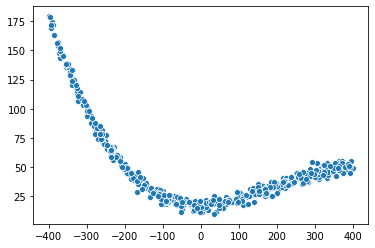

In [24]:
import seaborn as sns

sns.scatterplot(x=data.dataset[:,0], y=data.dataset[:,1])

In [25]:
data_train, data_test = data.split(0.8)

In [28]:
data_train.shape

(400, 2)

In [29]:
data_test.shape

(99, 2)

# Poly Reg

In [201]:
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        constante = np.mean(Y)
        self.model = constante


    def predict(self, X):
        y_hat = self.model
        return y_hat
    
    
class PolinomialRegression(BaseModel):
    
    def __init__(self):
        self.n = 1
    
    def fit(self, n, X, Y):
        
        self.n = n
        
        X_ = np.ones((X.shape[0],X.shape[1]*self.n+1))

        ini = 1

        for i in range(1,self.n+1):
            fin = X.shape[1]*i+1
            X_[:,ini:fin] = X**i
            ini = fin
           
        W = np.matmul(np.linalg.inv(np.matmul(X_.T,X_)),np.matmul(X_.T,Y))
        self.model = W
        print('Calculo W= {}'.format(W))

    def predict(self, X):
        
        X_ = np.ones((X.shape[0],X.shape[1]*self.n+1))

        ini = 1

        for i in range(1,self.n+1):
            fin = X.shape[1]*i+1
            X_[:,ini:fin] = X**i
            ini = fin
            
        y_hat = np.sum(self.model.T * X_, axis=1)
        return y_hat

In [31]:
class Metric(object):
    
    def MSE(self, Y, y_hat):
        mean_sq_err = np.mean(np.sqrt((Y-y_hat)**2))
        return mean_sq_err

In [217]:
def k_folds(k, model_objet, model_degree, X, Y):
    len_fold = X.shape[0]//k
    X_folds = np.array([])
    Y_folds = np.array([])
    X_validation = np.array([])
    Y_validation = np.array([])
    metric = Metric()
    models_folds = np.array([])
    mse_folds = np.array([])
    w_folds = np.array([])
    model_count = np.array([])
    
    
    for i in range(k):
        X_folds = np.append(X_folds, X[len_fold*k*i:len_fold*k*(i+1),:])
        Y_folds = np.append(Y_folds, Y[len_fold*k*i:len_fold*k*(i+1),:])
    
    
    X_folds = X_folds.reshape(k,len_fold,X.shape[1])
    Y_folds = Y_folds.reshape(k,len_fold,Y.shape[1])
    #print(X_folds.shape)
    pos = np.array(range(k))
    
    for i in range(k):
        X_train = X_folds[0]
        Y_train = Y_folds[0]
        for j in range(1,k-2):
            X_train = np.append(X_train,X_folds[j],axis=0)
            Y_train = np.append(Y_train,Y_folds[j],axis=0)
        X_test = X_folds[k-2:k-1][0]
        Y_test = Y_folds[k-2:k-1][0]
        
        #X_validation = np.append(X_validation, X_folds[k-1:k][0])
        #Y_validation = np.append(Y_validation, Y_folds[k-1:k][0])
        
        pos = np.append(-1,np.array(range(len(pos)))[:-1])
        X_folds = X_folds[pos]
        Y_folds = Y_folds[pos]
        
        print('Modelo CV: {}'.format(i+1))
        model_count = np.append(model_count, i+1)
        models_folds = np.append(models_folds, model_objet)
        models_folds[i].fit(model_degree, X_train,Y_train)
        #print('\n')
        w_folds = np.append(w_folds, model_objet.model)
        mse_folds = np.append(mse_folds, metric.MSE(Y_test, model_objet.predict(X_test)))
        
    
  
    #mean_mse = np.mean(mse_folds)    
    best_model_mask = np.argsort(mse_folds)
    pos_w_best = int(model_count[best_model_mask][0])
    len_w = len(model_objet.model)
    
    
    # Esta asi porque no me dio el tiempo para pensar como generalizarlo
    #model_objet.model = w_folds[2:4]
    #model_objet.model = w_folds[9:12]
    #model_objet.model = w_folds[12:16]
    model_objet.model = w_folds[15:20]
    model_objet.n = model_degree
    print('El mejor modelo obtenido tuvo un MSE de {} y fue el modelo {}'.format(mse_folds[best_model_mask][0],pos_w_best))
    #return(mean_mse)
    #return X_validation[id_min_sort][0], Y_validation[id_min_sort][0], models_folds[id_min_sort][0]


In [205]:
poly = PolinomialRegression()


w_folds = k_folds(5, poly, 1, data_train[:,0].reshape(400,1), data_train[:,1].reshape(400,1))

Modelo CV: 1
Calculo W= [[44.5110938 ]
 [-0.07177765]]
Modelo CV: 2
Calculo W= [[46.34745889]
 [-0.08070382]]
Modelo CV: 3
Calculo W= [[51.10253124]
 [-0.09046925]]
Modelo CV: 4
Calculo W= [[52.68894789]
 [-0.08640858]]
Modelo CV: 5
Calculo W= [[50.44654289]
 [-0.08177844]]
El mejor modelo obtenido tuvo un MSE de 26.78957572708323 y fue el modelo 2


In [206]:
poly.model

array([46.34745889, -0.08070382])

In [224]:
y_hat_poly = poly.predict(data_test[:,0].reshape(99,1))

In [225]:
metric = Metric()

mse_poly = metric.MSE(data_test[:,1].reshape(99,1),y_hat_poly)
mse_poly

32.144072473290656

In [208]:
poly2 = PolinomialRegression()


w_folds = k_folds(5, poly2, 2, data_train[:,0].reshape(400,1), data_train[:,1].reshape(400,1))

Modelo CV: 1
Calculo W= [[ 1.75209937e+01]
 [-8.83885785e-02]
 [ 5.76414103e-04]]
Modelo CV: 2
Calculo W= [[ 1.73007885e+01]
 [-8.86402713e-02]
 [ 5.98232119e-04]]
Modelo CV: 3
Calculo W= [[ 1.68611952e+01]
 [-9.37173152e-02]
 [ 6.05826147e-04]]
Modelo CV: 4
Calculo W= [[ 1.72549959e+01]
 [-9.80945217e-02]
 [ 5.90221772e-04]]
Modelo CV: 5
Calculo W= [[ 1.67721440e+01]
 [-9.78057753e-02]
 [ 5.95908250e-04]]
El mejor modelo obtenido tuvo un MSE de 31.713355818317453 y fue el modelo 4


In [209]:
poly2.model

array([ 1.72549959e+01, -9.80945217e-02,  5.90221772e-04])

In [210]:
y_hat_poly2 = poly2.predict(data_test[:,0].reshape(99,1))

In [211]:
mse_poly2 = metric.MSE(data_test[:,1].reshape(99,1),y_hat_poly2)
mse_poly2

39.83514998138893

In [213]:
poly3 = PolinomialRegression()


w_folds = k_folds(5, poly3, 3, data_train[:,0].reshape(400,1), data_train[:,1].reshape(400,1))

Modelo CV: 1
Calculo W= [[ 1.79976941e+01]
 [ 4.20786487e-03]
 [ 6.03373745e-04]
 [-1.04699863e-06]]
Modelo CV: 2
Calculo W= [[ 1.80081007e+01]
 [ 2.40033693e-03]
 [ 6.03908106e-04]
 [-1.02612087e-06]]
Modelo CV: 3
Calculo W= [[ 1.83763490e+01]
 [ 1.19480367e-03]
 [ 5.96669419e-04]
 [-1.01614558e-06]]
Modelo CV: 4
Calculo W= [[ 1.82192157e+01]
 [-8.25772909e-04]
 [ 5.98328167e-04]
 [-9.97196229e-07]]
Modelo CV: 5
Calculo W= [[ 1.78606303e+01]
 [ 1.17593246e-03]
 [ 6.03227107e-04]
 [-1.01377231e-06]]
El mejor modelo obtenido tuvo un MSE de 29.270844711281516 y fue el modelo 4


In [214]:
poly3.model

array([ 1.82192157e+01, -8.25772909e-04,  5.98328167e-04, -9.97196229e-07])

In [215]:
y_hat_poly3 = poly3.predict(data_test[:,0].reshape(99,1))

In [216]:
mse_poly3 = metric.MSE(data_test[:,1].reshape(99,1),y_hat_poly3)
mse_poly3

38.71022861490196

In [218]:
poly4 = PolinomialRegression()


w_folds = k_folds(5, poly4, 4, data_train[:,0].reshape(400,1), data_train[:,1].reshape(400,1))

Modelo CV: 1
Calculo W= [[ 1.76909265e+01]
 [ 4.28047472e-03]
 [ 6.23846359e-04]
 [-1.04512444e-06]
 [-1.56542786e-10]]
Modelo CV: 2
Calculo W= [[ 1.76705408e+01]
 [ 2.64942883e-03]
 [ 6.26454824e-04]
 [-1.02764278e-06]
 [-1.75211922e-10]]
Modelo CV: 3
Calculo W= [[ 1.86206980e+01]
 [ 9.32281839e-04]
 [ 5.82525842e-04]
 [-1.01381391e-06]
 [ 1.04880513e-10]]
Modelo CV: 4
Calculo W= [[ 1.84461525e+01]
 [-9.44439155e-04]
 [ 5.85860024e-04]
 [-9.96810808e-07]
 [ 8.87946884e-11]]
Modelo CV: 5
Calculo W= [[ 1.77251801e+01]
 [ 1.20042735e-03]
 [ 6.11579613e-04]
 [-1.01357478e-06]
 [-6.09317928e-11]]
El mejor modelo obtenido tuvo un MSE de 29.20918057572092 y fue el modelo 4


In [219]:
poly4.model

array([ 1.84461525e+01, -9.44439155e-04,  5.85860024e-04, -9.96810808e-07,
        8.87946884e-11])

In [220]:
y_hat_poly4 = poly4.predict(data_test[:,0].reshape(99,1))

In [221]:
mse_poly4 = metric.MSE(data_test[:,1].reshape(99,1),y_hat_poly4)
mse_poly4

38.69141709328436

# Conclusion

In [239]:
mse_models = [mse_poly,mse_poly2,mse_poly3,mse_poly4]
models = ['poly 1','poly 2','poly 3','poly 4']

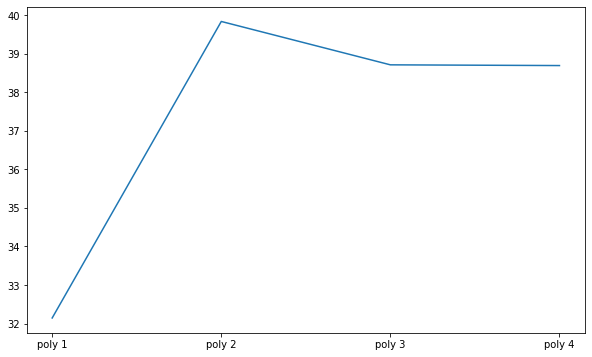

In [240]:
fig = plt.figure(figsize=(10,6))
plt.plot(models,mse_models)

Segun la metrica del `Mean Square Error el polinomio` que tiene menor diferencia punto a punto es el polinomio de `n=1`

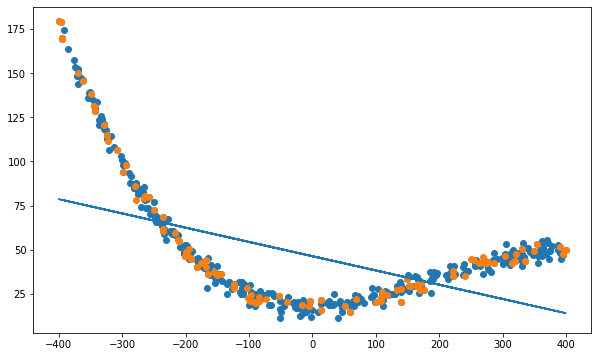

In [236]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.scatter(data_train[:,0].reshape(400,1),data_train[:,1].reshape(400,1), label = 'Train')
plt.scatter(data_test[:,0].reshape(99,1),data_test[:,1].reshape(99,1), label = 'Test')
plt.plot(data_test[:,0].reshape(99,1),y_hat_poly)

# Optimizacion por Mini-Batch

In [242]:
data_train2, data_test2 = data.split(4/5)

In [323]:
def MBatch_gradient_decent(x_train, y_train, lr=0.01, n_epochs=100, b=10):
    
    X_ = np.ones((x_train.shape[0],x_train.shape[1]+1))
    X_[:,:-1] = x_train
    
    f = X_.shape[0]
    c = X_.shape[1]
    
    
    w = np.random.randn(c).reshape(c,1)
    
    for epoch in range(0,n_epochs):
        idx = np.random.permutation(X_.shape[0])
        x_train = X_[idx]
        y_train = y_train[idx]
        
        batch_size = int(f/b)
        
        for n in range(0,f, batch_size):
            end = n + batch_size if n + batch_size <= f else f
            batch_x = X_[n:end]
            batch_y = y_train[n:end]
            
            
            pred = np.sum(w.T * batch_x, axis=1).reshape(batch_x.shape[0],1)
            error = batch_y - pred
            
            grad_sum = np.sum(error * batch_x, axis = 0)
            grad_mul =  -2/f * grad_sum
            gradient = np.transpose(grad_mul).reshape(w.shape[0],1)
            
            
            w = w - (lr * gradient)

    return w

In [324]:
MBatch_gradient_decent(data_train2[:,0].reshape(400,1),data_train2[:,1].reshape(400,1))

/Users/francobenko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
/Users/francobenko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in subtract


array([[nan],
       [nan]])